(4000, 20000)


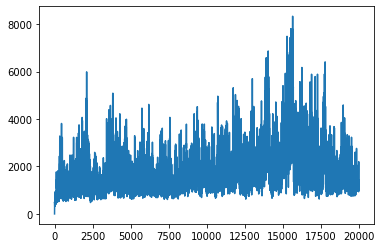

In [35]:
import colorednoise as cn, numpy as np, matplotlib.pyplot as plt
beta = 1 # the exponent
nsamps = 40000
data = []
for _ in range(4000):
    coef = np.random.lognormal(mean=1, sigma=1.5, size=None)
    y0 = np.random.uniform(-2, 2)
    y = coef*cn.powerlaw_psd_gaussian(beta, nsamps)[:nsamps//2]
    y = [yv-y[0]+y0 for yv in y]
    data.append(y)
data = np.array(data)
print(data.shape)
stds = np.var(data, axis=0)
plt.plot(stds)
plt.show()

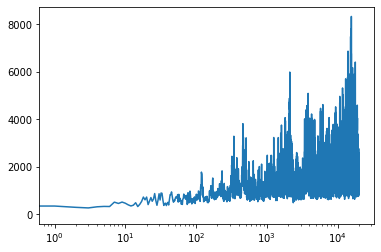

In [36]:

stds = np.var(data, axis=0)
plt.plot(stds)
plt.xscale('log')
plt.show()

0.19036539387158785
0.19036539387158785
0.19036539387158785
0.19036539387158785
0.19036539387158785


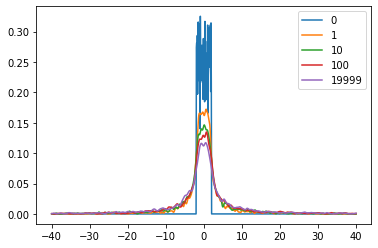

In [38]:
from scipy.stats import gaussian_kde
for i in [0,1,10,100,19999]:
    kde = gaussian_kde(data[:,i])
    print(kde.factor)
    kde.set_bandwidth(kde.factor/20)
    x = np.linspace(-40, 40, num=1000)
    plt.plot(x, kde.pdf(x), label=i)
plt.legend()